In [54]:
import rebound
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1e-3, x=1., vy=1.)
sim.add(m=1e-3, a=2., e=0.1)
sim.integrator = "ias15"
sim.dt = 1e-2
sim.move_to_com()

In [55]:
sim.status()

---------------------------------
REBOUND version:     	3.6.6
REBOUND built on:    	Aug 21 2018 09:37:11
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.010000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.00279540818463 y=0.0 z=0.0 vx=0.0 vy=-0.00177995639366 vz=0.0>
<rebound.Particle object, m=0.001 x=0.997204591815 y=0.0 z=0.0 vx=0.0 vy=0.998220043606 vz=0.0>
<rebound.Particle object, m=0.001 x=1.79820359281 y=0.0 z=0.0 vx=0.0 vy=0.781736350058 vz=0.0>
---------------------------------


In [56]:
#sim.integrate(6.28318530717959, exact_finish_time=0)   # 6.28318530717959 is 2*pi

In [57]:
import numpy as np
torb = 2.*np.pi
Noutputs = 1000
norb = 1000
times = np.linspace(torb, norb*torb, Noutputs)
x = np.zeros(Noutputs)
y = np.zeros(Noutputs)
particles = sim.particles
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    x[i] = particles[1].x
    y[i] = particles[1].y

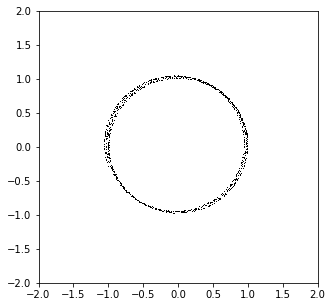

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(x, y,',');

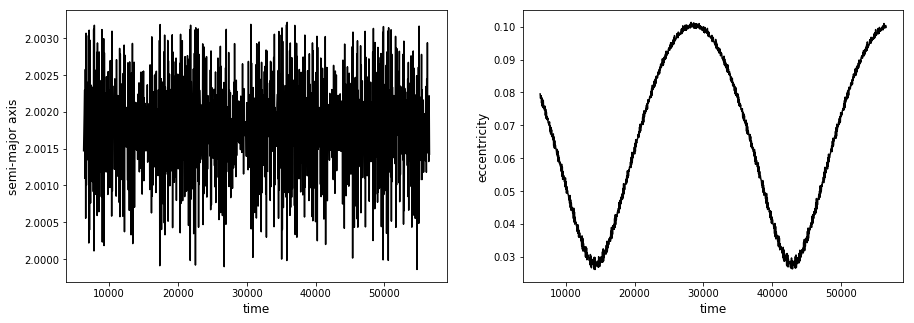

In [59]:
times = np.linspace(1000.*torb, 9000.*torb, Noutputs)
a = np.zeros(Noutputs)
e = np.zeros(Noutputs)
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    a[i] = sim.particles[2].a
    e[i] = sim.particles[2].e

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(121)
ax.set_xlabel("time")
ax.set_ylabel("semi-major axis")
plt.plot(times, a);

ax = plt.subplot(122)
ax.set_xlabel("time")
ax.set_ylabel("eccentricity")
plt.plot(times, e);